In [3]:
!pip install wordcloud

In [4]:
import json
from collections import defaultdict

import plotly.graph_objects as go
from wordcloud import WordCloud

In [5]:
file = 'buynomics-posts.json'
with open(file, 'r') as f:
    posts = json.load(f)

In [6]:
# General introduction: mathematical operations, printing

In [7]:
# Data structures: lists, dicts, sets

In [8]:
# Check out a random post
post = posts[52]
post

{'urn': 'urn:li:activity:7076937406502813696',
 'text': "\nHappy World Productivity Day! 🌍 \n\nIn celebration of this special day, we wanted to share with you an insightful blog article that dives into the world of #pricing tools.\n\n📚 Pricing Tools: From Excel to SaaS\n🔗 https://hubs.la/Q01V3-4T0\n\nIn today's fast-paced and competitive business landscape, having the right tools at your disposal can make all the difference. Pricing tools have become an essential part of any successful organization's arsenal, helping streamline processes, improve efficiency, and ultimately drive #revenue growth.\n\nWhether you're a pricing professional, a business owner, or simply someone interested in understanding the latest trends in pricing strategies, this article will provide you with practical tips and knowledge that can transform your approach to pricing.\n\nLet's embrace World Productivity Day by equipping ourselves with the right tools and knowledge to maximize our efficiency and drive succes

In [9]:
# Find the most liked post

In [10]:
# Find the most commented post

In [11]:
# Searching posts:
# - Find how many posts mention "12k+"
# - Find the context in which "12k+" was used
counter = 0
marked = []
key = "12k+"
for i, post in enumerate(posts):
    if key in post['text']:
        counter += 1
        marked.append(i)
print(counter, marked)
print(posts[marked[0]])

1 [28]
{'urn': 'urn:li:activity:7029402634679672832', 'text': 'We are happy to announce that Buynomics has been named one of the fastest-growing startups in Germany for 2022, ranking in the Top 100 out of a staggering 12k+ startups! 🚀  As...', 'url': 'https://www.linkedin.com/feed/update/urn:li:activity:7029402634679672832?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7029402634679672832%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29', 'timeSincePosted': '10mo', 'likesCount': 70, 'commentsCount': 6, 'authorType': 'Company', 'authorProfileUrl': 'https://www.linkedin.com/company/buynomics/', 'authorProfileId': 'buynomics', 'authorFollowersCount': '10K', 'authorFullName': 'Buynomics', 'image': 'https://media.licdn.com/dms/image/C4E22AQHXEIGIAHLarA/feedshare-shrink_2048_1536/0/1675940187210?e=1704931200&v=beta&t=jwSsSEDMrPclfrOgjiBtDwjv2i1ebCuMVqmB47YcbIo'}


In [12]:
# For the selected post:
# - count the number of words
# - standardize the words
# - count the number of unique words
# - find the longest word
# - find the second-longest word
# - find the most popular word
# - list all hashtags
t = post['text']
words = t.split()

def standardize(words):
    out = []
    chars = ' ,.!?;:'
    for word in words:
        w = word.strip(chars)
        w = w.lower()
        out.append(w)
    return out

words = standardize(words)

print(len(words))
print(len(set(words)))

def longest(words):
    length = 0
    w =''
    for word in words:
        if len(word) > length:
            length = len(word)
            w = word
    return w

def popular(words):
    length = 0
    w =''
    for word in words:
        if len(word) > length:
            length = len(word)
            w = word
    return w

longest(words)

30
26


'appreciation'

In [13]:
# Count the number of likes and comments per word
liked_words = defaultdict(lambda: 0)
commented_words = defaultdict(lambda: 0)
total_words = defaultdict(lambda: 0)
for post in posts:
    text = post['text']
    likes = post['likesCount']
    comments = post['commentsCount']
    words = text.split()
    words = standardize(words)
    for word in words:
        liked_words[word] += likes
        commented_words[word] += comments
        total_words[word] += 1

liked_words

defaultdict(<function __main__.<lambda>()>,
            {'of': 840,
             'buynomics.talks': 51,
             'our': 592,
             'guest': 25,
             'is': 298,
             'stephan': 25,
             'm': 25,
             'liozu': 25,
             'ph.d': 25,
             'founder': 63,
             'value': 49,
             'innoruption': 25,
             'advisors': 25,
             'and': 1312,
             'pricingfortheplanet': 25,
             'for': 261,
             'free': 221,
             '#webinar': 99,
             '#buynomics': 229,
             '#buynomicstalks': 13,
             'this': 380,
             'past': 65,
             'weekend': 36,
             'buynomics': 1129,
             'attended': 36,
             'ie': 36,
             "university's": 36,
             'careers': 36,
             'forum': 154,
             'in': 927,
             'madrid': 36,
             'to': 1528,
             'meet': 36,
             'the': 1563,
             

In [14]:
normalized = True

# normalized
liked_words_list = [(like / (total_words[word] if normalized else 1), word) for word, like in liked_words.items()]
liked_words_list = sorted(liked_words_list, reverse=True)
# print(liked_words_list)

scores = [e[0] for e in liked_words_list]
labels = [e[1] for e in liked_words_list]
cutoff = 500

fig = go.Figure([go.Bar(x=labels[:cutoff], y=scores[:cutoff])])
fig.update_yaxes(title='Score')
fig.update_xaxes(title='Word')
fig.update_layout(title = f"{cutoff} most impactful words in Buynomics' posts (likes)")
fig.show()

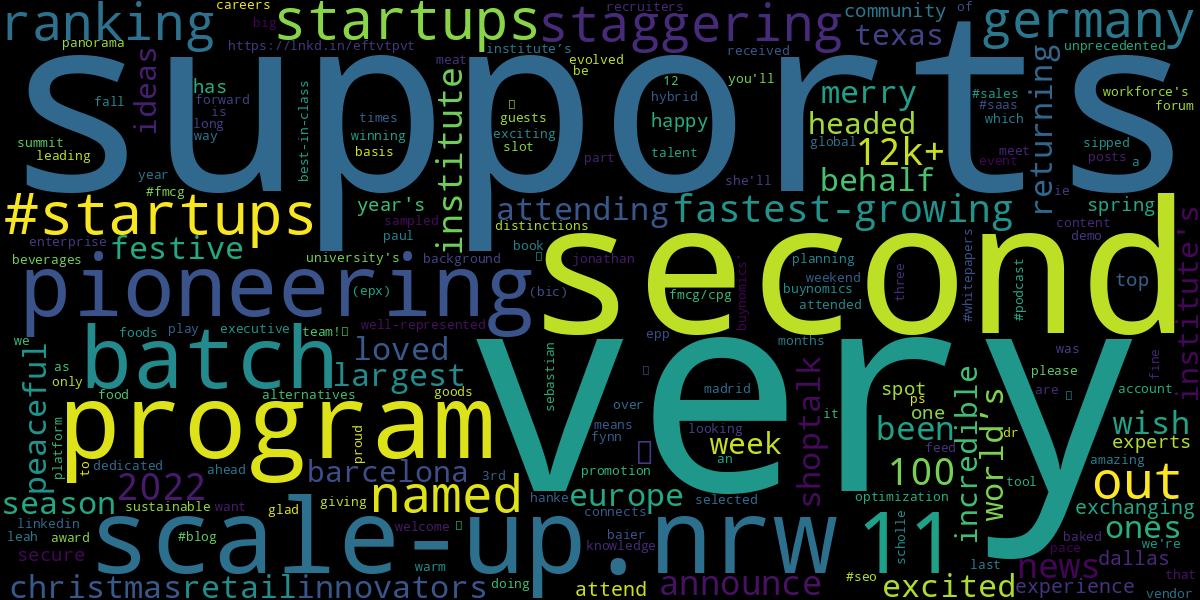

In [15]:
height =600
width = 2 * height
likes_cloud = WordCloud(height=height, width = width).fit_words({word: score for score, word in liked_words_list})
likes_cloud.to_image()

In [16]:
# normalized
commented_words_list = [(comment / (total_words[word] if normalized else 1), word) for word, comment in commented_words.items()]
commented_words_list = sorted(commented_words_list, reverse=True)
# print(liked_words_list)

scores = [e[0] for e in commented_words_list]
labels = [e[1] for e in commented_words_list]

fig = go.Figure([go.Bar(x=labels[:cutoff], y=scores[:cutoff])])
fig.update_yaxes(title='Score')
fig.update_xaxes(title='Word')
fig.update_layout(title = f"{cutoff} most impactful words in Buynomics' posts (comments)")
fig.show()

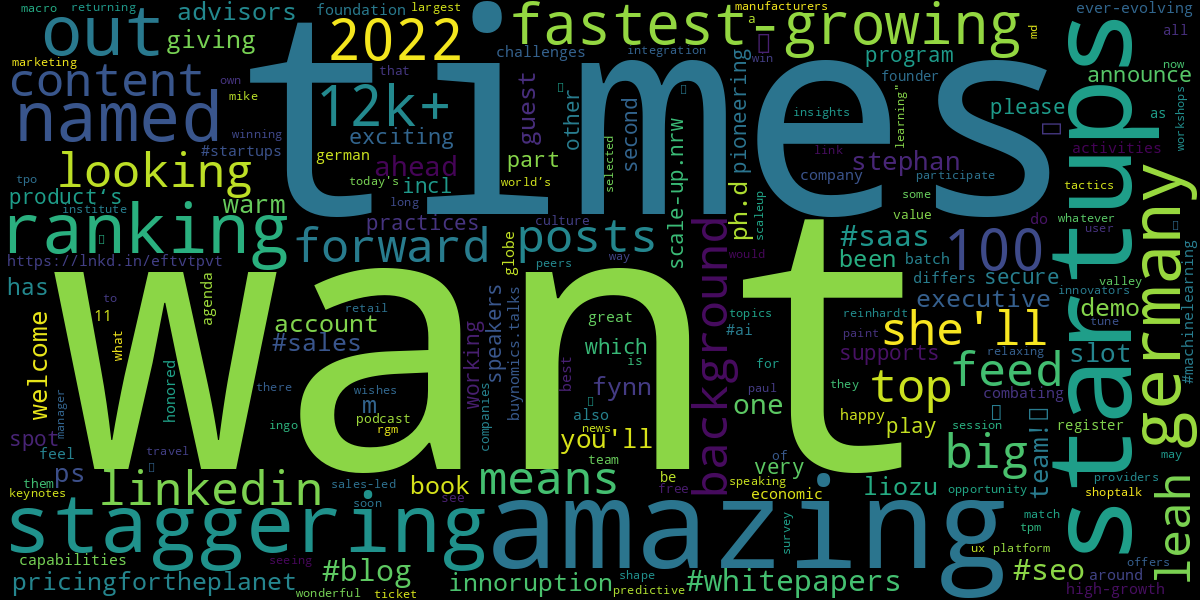

In [17]:
likes_cloud = WordCloud(height=height, width = width).fit_words({word: score for score, word in commented_words_list})
likes_cloud.to_image()